<a href="https://colab.research.google.com/github/oramirezperera/Vectors_linear_algebra/blob/main/clustering_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We create the functions that do the k-mean algorithm 

In [2]:
def group_assigment(data, centroids):
  grouping_vec_c = np.zeros(len(data))
  for i in range(len(data)):
    dist = np.zeros(len(centroids)) #distance
    for j in range(len(centroids)):
      dist[j] = np.linalg.norm(data[i] - centroids[j]) #distance between the centroid and the data
    min_dist = min(dist)
    for j in range(len(centroids)):
      if min_dist == dist[j]:
        grouping_vec_c[i] = j+1
  return grouping_vec_c

In [3]:
def update_centroid(data, grouping, centroids):
  new_centroids = []
  for i in range(len(centroids)):
    cent = np.zeros(len(data[0]))
    count = 0
    for j in range(len(data)):
      if grouping[j] == (i+1):
        cent = cent+data[j]
        count += 1
    group_average = cent/count
    new_centroids.append(group_average)
  return new_centroids

In [4]:
def clustering_objective(data, grouping, centroids):
  J_obj = 0
  for i in range(len(data)):
    for j in range(len(centroids)):
      if grouping[i] == (j+1):
        J_obj += np.linalg.norm(data[i] - centroids[j])**2
  J_obj = J_obj/len(data)
  return J_obj

Now we put together all the functions in this k-mean algorithm

In [15]:
def kmeans_algorithm(data, centroids):
  iteration = 0
  J_obj_vector = []
  stop = False
  while stop == False:
    grouping = group_assigment(data, centroids)
    new_centroids = update_centroid(data, grouping, centroids)
    J_obj = clustering_objective(data, grouping, new_centroids)
    J_obj_vector.append(J_obj)
    iteration += 1
    if np.linalg.norm(np.array(new_centroids)- np.array(centroids)) < 1e-6:
      stop = True
    else:
      centroids = new_centroids
  return new_centroids, grouping, J_obj_vector, iteration

Now we plot our k-means algorithm

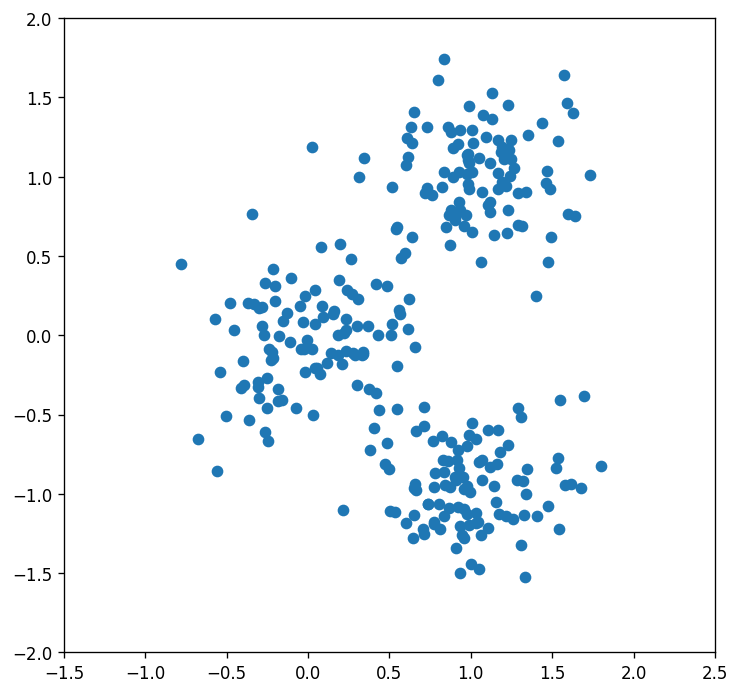

In [6]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
X = np.concatenate([[0.3*np.random.randn(2) for i in range(100)],\
                    [[1,1] + 0.3*np.random.randn(2) for i in range(100)],\
                    [[1,-1] + 0.3*np.random.randn(2) for i in range(100)]])
ax.scatter(X[:,0], X[:,1])
ax.set_xlim(-1.5,2.5)
ax.set_ylim(-2,2)
plt.show()

we generated random dots around (0,0),(1,1),(1,-1) and now we are going to generate our clustering with k-means

In [16]:
A = kmeans_algorithm(X, X[:3])

Let's see the length of A

In [17]:
len(A)

4

And we want to see our representative vectors in A

In [18]:
A[0]

[array([ 0.00688736, -0.0411935 ]),
 array([ 0.99261224, -0.95380115]),
 array([1.03299587, 1.01205752])]

Those vectors are the points where our clustering is made

Now let's see what's in A

In [19]:
A

([array([ 0.00688736, -0.0411935 ]),
  array([ 0.99261224, -0.95380115]),
  array([1.03299587, 1.01205752])],
 array([1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.

What are we watching here? 

we did 6 iterations, that means the center of the clusters moved 6 times.

The representative vector A[0] is what we expected a vector around (0,0),(1,1) and (1,-1)

Let's plot the j values to see how was the movement of the center of the clusters

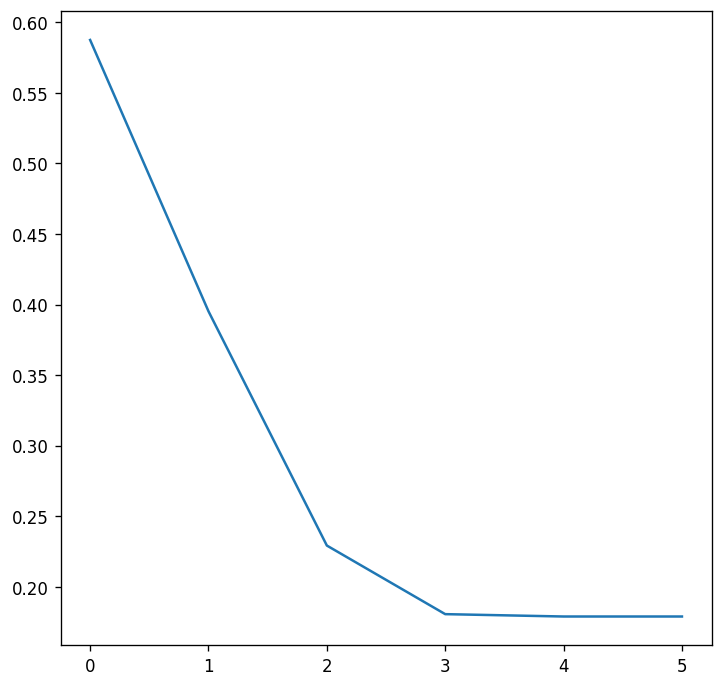

In [21]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.plot(list(range(A[-1])),A[2])
plt.show()

As we can see the cluster after the second iteration is smaller and smaller

Now we want to see with colors the clusterization 

We create the list g_1, g_2 and g_3

In [22]:
group_1 = []
group_2 = []
group_3 = []

# we use A[1] because is where the number of the groups are stored
for i in range(len(A[1])):
  if A[1][i] == 1:
    group_1.append(i)
  elif A[1][i] == 2:
    group_2.append(i)
  elif A[1][i] == 3:
    group_3.append(i)

# We separate in x and y to graficate
x_1 = [X[:,0][group_1[i]] for i in range(len(group_1))]
y_1 = [X[:,1][group_1[i]] for i in range(len(group_1))]

x_2 = [X[:,0][group_2[i]] for i in range(len(group_2))]
y_2 = [X[:,1][group_2[i]] for i in range(len(group_2))]

x_3 = [X[:,0][group_3[i]] for i in range(len(group_3))]
y_3 = [X[:,1][group_3[i]] for i in range(len(group_3))]

Now we plot

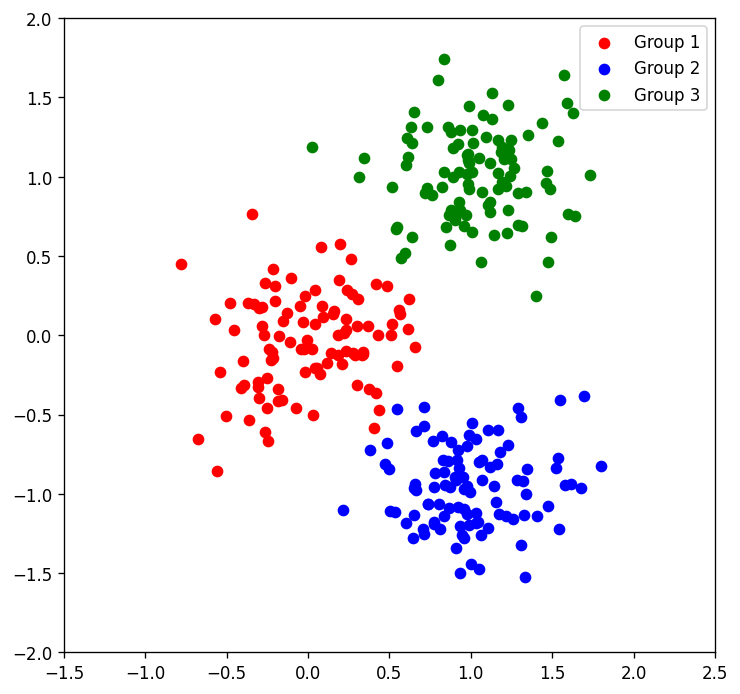

In [25]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)

ax.scatter(x_1, y_1, color='red', label='Group 1')
ax.scatter(x_2, y_2, color='blue', label='Group 2')
ax.scatter(x_3, y_3, color='green', label='Group 3')
ax.set_xlim(-1.5, 2.5)
ax.set_ylim(-2,2)
plt.legend()
plt.show()

now We can see how the clustering and which points are in which group